#### A Common Procedure for Machine Learning

The process of developing a machine learning model typically involves several key stages. Understanding each step is crucial for effectively applying machine learning techniques to solve practical problems.

1. **Data Preparation**
   - This involves collecting, cleaning, and preprocessing the data.
   - Data may need to be normalized, missing values handled, and categorical data encoded.
   - It's also important to split the data into training and testing sets.  


2. **Model Selection or Definition**
   - Choose an appropriate model based on the problem type (e.g., regression, classification).
   - This could involve selecting a pre-existing model or defining a new model architecture.  


3. **Define Loss Function**
   - The loss function measures how well the model's predictions match the actual data.
   - The choice of loss function depends on the type of machine learning task (e.g., Mean Squared Error for regression, Cross-Entropy for classification).  


4. **Define Optimization Method**
   - Choose an optimization algorithm to minimize the loss function.
   - Common choices include Gradient Descent, Stochastic Gradient Descent, Adam, etc.  


5. **Training**
   - This is the process of feeding the data through the model and using the optimization method to adjust the model parameters.
   - Training is iterative and continues until the model performance reaches a satisfactory level or stops improving.  


6. **Inference**
   - Once trained, the model is used to make predictions on new data.
   - This step is about deploying the model and using it to obtain insights, make decisions, or further analyze unseen data.


## A Simple Regression Example: Predicting Test Scores from Study Hours

In this example, we explore a fundamental concept in machine learning and statistics: linear regression. We will be working with a dataset that consists of the study hours and test scores of different students. The goal is to understand and model the relationship between the amount of time a student spends studying and their corresponding test score. 


In [2]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import urllib
import matplotlib.animation as animation

#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

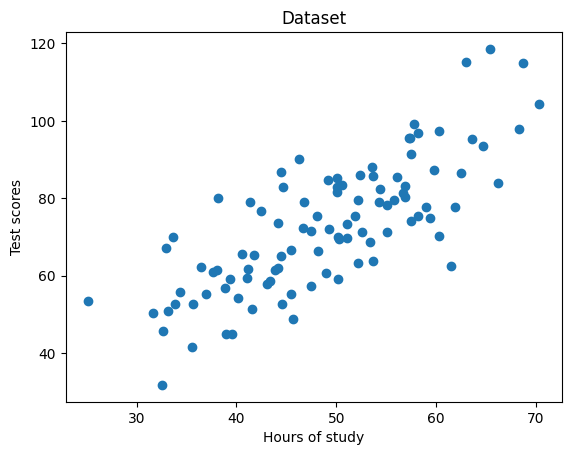

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/CC-MNNIT/2018-19-Classes/master/MachineLearning/2018_08_22_Logical-Rhythm-2/data.csv", "data.csv")

data = np.genfromtxt('data.csv', delimiter=',')

#Extract columns
x = np.array(data[:,0])
y = np.array(data[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

#### It is obvious that the hours of study and test scores are linearly related. And we step to investigate the relationship starting from the simplest linear model.

A Linear Model is a model where the output is a linear combination of the input variables. Normally, it is defined as follows: 
$$y = a_1x_1+ a_2x_2+...+a_mx_m+b$$ 
Suppose we have $n$ data points. A linear regression seeks to find the line that best fits these data points. In other words, we aim to find the coefficients $a_1, a_2, ..., a_m, b$ that minimize the error between the predicted value and the actual value.

The loss function, representing the average of the squares of these errors, can be expressed as: 
$$L = \frac{\sum_{i=1}^{n} (y_i - (a_1x_{i1}+a_2x_{i2}+...+a_mx_{im}+b))^2}{n}$$

In [4]:
def compute_loss(b, a, data):
    total_loss = 0

    # number of datapoints in training data
    N = float(len(data))

    # Compute sum of squared errors
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        total_loss += (y - (a * x + b)) ** 2

    # Return average of squared error
    return total_loss/N

![Gradient Descent](./gradient_descent.png)

#### Gradient Descent

Gradient Descent is a method used to find the minimum of a functions. The basic idea is to iteratively adjust the coefficients to minimize this loss function.

The steps in Gradient Descent are as follows:

1. **Initialize the Coefficients**: Start with random values for the coefficients $a_1, a_2, ..., a_n, b$.

2. **Compute the Gradient**: Calculate the gradient of the loss function with respect to each coefficient. The gradient is a vector that points in the direction of the steepest increase of the function. In the context of linear regression, it shows how much the loss will change with a small change in each coefficient.

3. **Update the Coefficients**: Adjust the coefficients in the opposite direction of the gradient by a small amount, proportional to a learning rate parameter. The learning rate controls how big a step we take towards the minimum with each iteration.

4. **Repeat**: Repeat steps 2 and 3 until the coefficients converge to their optimal values, or a maximum number of iterations is reached.

The formula for updating each coefficient is:
$$w_j := w_j - \alpha \frac{\partial}{\partial w_j} L(W)$$
Where:
- $w_j$ is the current value of the coefficient.
- $\alpha$ is the learning rate.
- $\frac{\partial}{\partial w_j} L(W)$ is the partial derivative of the loss function with respect to $w_j$.

Gradient Descent is favored in machine learning for its simplicity and efficiency, especially in situations where the closed-form solution is not feasible. However, choosing the right learning rate and dealing with issues like local minima are important considerations when using this method.

### In our case, 
$$L = \frac{\sum_{i=1}^{n} (y_i - (ax_i+b))^2}{n}$$
and we have 
$$\frac{\partial}{\partial a} L(W) = \frac{\sum_{i=1}^{n} 2(-x_{i})(y_i - (ax_i+b))}{n}$$

$$\frac{\partial}{\partial b} L(W) = \frac{\sum_{i=1}^{n} 2(y_i - (ax_i+b))}{n}$$

our gradient update rule is:
$$a := a - \alpha \frac{\partial}{\partial a} L(W) = a - \alpha \frac{\sum_{i=1}^{n} 2(-x_{i})(y_i - (ax_i+b))}{n} $$
$$b := b - \alpha \frac{\partial}{\partial b} L(W) = b - \alpha \frac{\sum_{i=1}^{n} 2(y_i - (ax_i+b))}{n} $$



#### Define Gradient Descent functions

In [5]:
def step_gradient(b_current, a_current, data, alpha):
    """takes one step down towards the minima

    Args:
        b_current (float): current value of b
        a_current (float): current value of a
        data (np.array): array containing the training data (x,y)
        alpha (float): learning rate / step size
        m_progress.append(m)

    Returns:
        tuple: (b,a) new values of b,a
    """

    a_gradient = 0
    b_gradient = 0
    N = float(len(data))

    # Calculate Gradient
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        a_gradient += - (2/N) * x * (y - (a_current * x + b_current))
        b_gradient += - (2/N) * (y - (a_current * x + b_current))

    # Update current a and b
    a_updated = a_current - alpha * a_gradient
    b_updated = b_current - alpha * b_gradient

    #Return updated parameters
    return b_updated, a_updated

def gradient_descent(data, starting_b, starting_a, learning_rate, num_iterations):
    """runs gradient descent

    Args:
        data (np.array): training data, containing x,y
        starting_b (float): initial value of b (random)
        starting_a (float): initial value of a (random)
        learning_rate (float): hyperparameter to adjust the step size during descent
        num_iterations (int): hyperparameter, decides the number of iterations for which gradient descent would run

    Returns:
        list : the first and second item are b, a respectively at which the best fit curve is obtained, the third and fourth items are two lists, which store the value of b,a as gradient descent proceeded.
    """

    # initial values
    b = starting_b
    a = starting_a

    # to store the loss after each iteration
    loss_graph = []

    # to store the value of b -> bias unit, a-> slope of line after each iteration (pred = a*x + b)
    b_progress = []
    a_progress = []

    # For every iteration, optimize b, a and compute its loss
    for i in range(num_iterations):
        loss_graph.append(compute_loss(b, a, data))
        b, a = step_gradient(b, a, np.array(data), learning_rate)
        b_progress.append(b)
        a_progress.append(a)

    return [b, a, loss_graph,b_progress,a_progress]

#### Run gradient_descent() to get optimized parameters b and a

In [6]:
#hyperparamters
learning_rate = 0.0001
initial_b = 0
initial_a = 0
num_iterations = 20

b, a, loss_graph,b_progress,a_progress = gradient_descent(data, initial_b, initial_a, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized a:', a)

#Print error with optimized parameters
print ('Minimized loss:', compute_loss(b, a, data))

Optimized b: 0.030269517287775917
Optimized a: 1.478895662279729
Minimized loss: 112.64994426496074


#### Plotting the loss per iterations

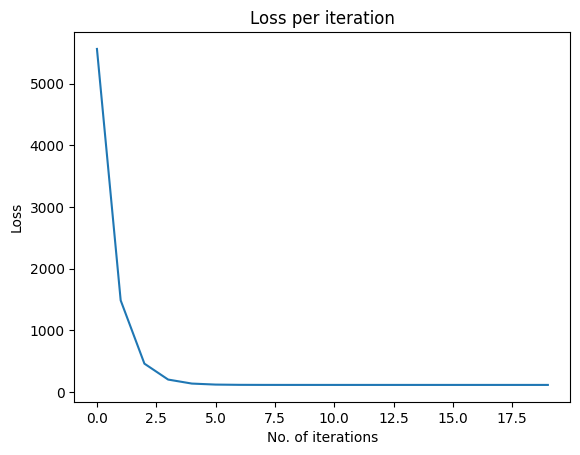

In [7]:
plt.plot(loss_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Loss')
plt.title('Loss per iteration')
plt.show()

Gradient descent converges to local minimum after 5 iterations

#### Plot line of best fit

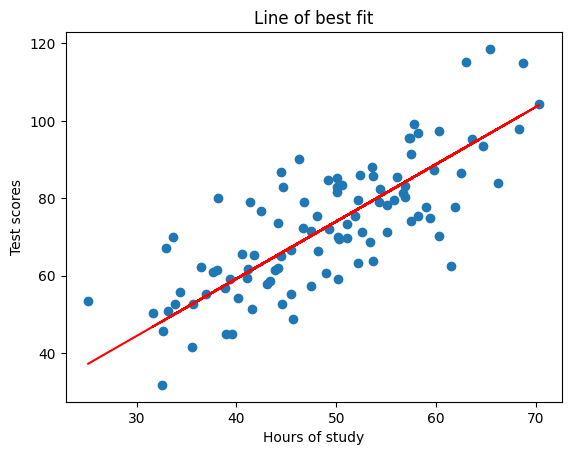

In [8]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = a * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

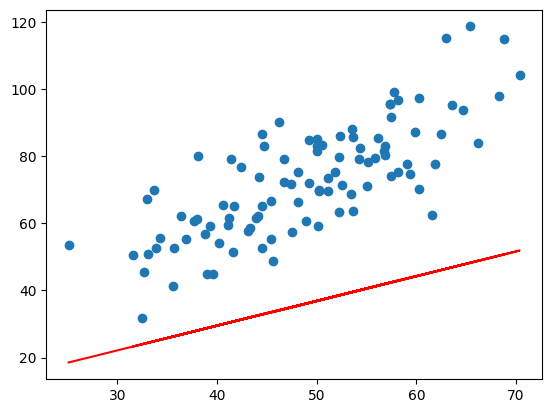

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
b = b_progress[0]
a = a_progress[0]
pred = a*x + b

line = ax.plot(x,pred, '-',c='r')[0]

def animate(i,b_prog,m_prog):
    pred = m_prog[i] * x + b_prog[i]
    line.set_data(x,pred)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(b_progress), fargs=(b_progress,a_progress,))
ax.scatter(x,y)
HTML(ani.to_jshtml())

## Additional Material

Linear Regression in matrix form: 
$$Y = XW$$

Where:
- $Y$ is the vector of observed values:
$$
\begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_m \\
\end{bmatrix}
$$

- $X$ is the matrix of input features, augmented with a column of ones for the intercept term:
$$
\begin{bmatrix}
x_{11} & x_{12} & ... & x_{1n} & 1 \\
x_{21} & x_{22} & ... & x_{2n} & 1 \\
...    & ...    & ... & ...    & ... \\
x_{m1} & x_{m2} & ... & x_{mn} & 1 \\
\end{bmatrix}
$$

- $W$ is the vector of coefficients (weights) including the intercept:
$$
\begin{bmatrix}
a_1 \\
a_2 \\
... \\ 
a_n \\
b \\
\end{bmatrix}
$$

In this case, the output ($Y$) is the test score, and the input ($X$) includes the hours of study along with other potential features.

#### Closed-Form Solution in Linear Regression

Linear regression can often be solved directly using a closed-form solution, known as the Normal Equation. This solution provides an analytical way to compute the coefficients $a_1, a_2, ..., a_n, b$ directly, without the need for iterative optimization methods like gradient descent.

The Normal Equation is given by:
$$W = (X^TX)^{-1}X^TY$$

In this equation:
- $X^T$ is the transpose of the matrix $X$.
- $(X^TX)^{-1}$ is the inverse of the matrix $X^TX$.
- $Y$ is the vector of observed values.
- $W$ is the vector of coefficients (weights) that we are trying to find.

The closed-form solution works well for datasets that are not too large, as the computational complexity of inverting the matrix $X^TX$ can be quite high for large datasets. In cases where $X^TX$ is non-invertible (singular or nearly singular), techniques such as regularization may be used to obtain a solution.

It's important to note that while the closed-form solution provides an exact answer under ideal conditions, in practice, due to reasons like numerical instability or the presence of redundant features, iterative methods such as gradient descent are often preferred, especially for large datasets or complex models.


[1.32243102 7.99102098]


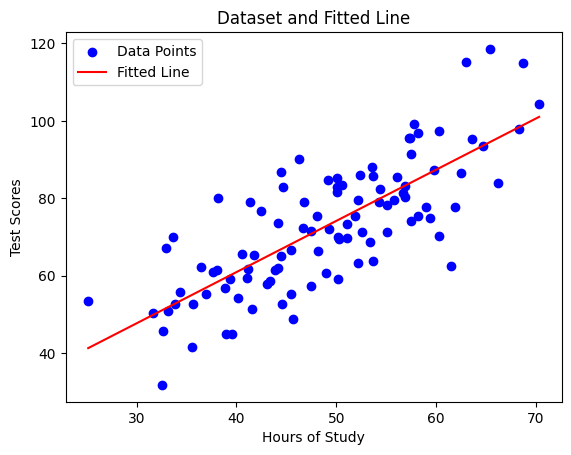

In [10]:
##close-form solution
X = np.column_stack((x, np.ones(x.shape)))

# Apply the Normal Equation to find the best fitting parameters
# w = (X^T X)^-1 X^T y
w = np.linalg.inv(X.T @ X) @ X.T @ y
print(w)
# Plotting the dataset
plt.scatter(x, y, color='blue', label='Data Points')
plt.xlabel('Hours of Study')
plt.ylabel('Test Scores')
plt.title('Dataset and Fitted Line')

# Plotting the regression line
x_line = np.linspace(x.min(), x.max(), 100)
y_line = w[0] * x_line + w[1]
plt.plot(x_line, y_line, color='red', label='Fitted Line')
plt.legend()

# Show the plot
plt.show()



References
----------
* [Linear Regression Demo](https://colab.research.google.com/github/CC-MNNIT/2018-19-Classes/blob/master/MachineLearning/2018_08_22_Logical-Rhythm-2/linear_regression.ipynb)
